## Tutorial: Buildings' power demand for cooling

For the purpose of demonstration, we show how you can use TEB to estimate the buildings' power demand for cooling due to Air Conditioning (AC) using sample data and parameters from the CAPITOUL campaign. Data are provided for demonstration purposes only and are not quality controlled (i.e. should not be used to conduct scientific experiments). Both data and tutorial are only meant to guide the user through setting up a simple experiment in TEB. If you are looking to conduct a scientific experiment, please download and process the data yourself (see the software documentation page) and amend the input namelist accordingly (see the namelist options page).

In [1]:
import sys
from pathlib import Path
import f90nml
import matplotlib.pyplot as plt

In [2]:
THIS_DIR = Path.cwd()
PROJ_DIR = THIS_DIR.parents[1]
sys.path.append(str(PROJ_DIR / 'tools'))
from helpers import run_teb, load_txt, get_date_params
from common_names import standard_quantity_names, teb_quantity_names_output, teb_quantity_names_output_by_keys

First define the PATH to the teb executable you have intalled using the installation instructions in the main README.md.

In [3]:
path_to_teb_exe = PROJ_DIR / 'build' / 'driver'
path_to_case_dir = THIS_DIR

then run TEB with data from the `input` folder and current namelist (`input.nml`) using the `run_teb` helper function provided.

In [4]:
run_teb(THIS_DIR, path_to_teb_exe, None)

Running case: CAPITOUL


Get datetime information using the `get_date_params` function and load all the outputs with the `load_txt` functions provided.

In [5]:
case_nml = path_to_case_dir / 'input.nml'
start, freq = get_date_params(case_nml)
# The start time in TEB is always given in UTC so we convert to local time with local_tz
df = load_txt(path_to_case_dir / 'output', start, freq, local_tz='Europe/Paris')
df

,ALB_TOWN,COP,DIR_CANYON,DQS_TOWN,EMIS_TOWN,EVAP_TOWN,Forc_PS,Forc_QA,Forc_RAIN,Forc_SNOW,...,THER_PROD_PANEL,TI_BLD,TS_TOWN,T_CANYON,T_ROAD1,T_ROOF1,T_WALLA1,T_WALLB1,USTAR_TOWN,U_CANYON
2004-02-20 00:00:00+01:00,0.0,2.5,0.0,-79.210484,0.969482,0.000005,98876.625000,0.004636,0.0,0.0,...,NaN,292.155724,274.431739,275.662657,273.613321,274.022093,276.325593,276.325593,0.333987,0.808382
2004-02-20 00:30:00+01:00,0.0,2.5,0.0,-88.573205,0.969482,0.000005,98879.311667,0.004615,0.0,0.0,...,NaN,292.158048,274.203885,275.767772,273.301585,273.486816,276.407705,276.407705,0.253877,0.697632
2004-02-20 01:00:00+01:00,0.0,2.5,0.0,-88.074004,0.969482,0.000004,98889.341667,0.004513,0.0,0.0,...,NaN,292.159100,274.137764,275.668003,273.170102,273.333386,276.566626,276.566626,0.267654,0.725170
2004-02-20 01:30:00+01:00,0.0,2.5,0.0,-86.020221,0.969482,0.000004,98878.653333,0.004488,0.0,0.0,...,NaN,292.159387,274.104239,275.925818,273.074745,273.208999,276.703796,276.703796,0.187991,0.665584
2004-02-20 02:00:00+01:00,0.0,2.5,0.0,-87.451391,0.969482,0.000003,98886.438333,0.004491,0.0,0.0,...,NaN,292.159473,273.888605,275.862986,273.011281,272.820396,276.827524,276.827524,0.032355,0.325535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-02-28 21:00:00+01:00,0.0,2.5,0.0,-85.610189,0.969863,0.000005,99582.008333,0.001916,0.0,0.0,...,NaN,292.160011,269.232112,271.813058,271.349457,266.529204,275.019376,275.019376,0.153439,0.720669
2005-02-28 21:30:00+01:00,0.0,2.5,0.0,-84.261754,0.969863,0.000005,99583.203333,0.001918,0.0,0.0,...,NaN,292.160048,269.022302,271.576984,271.222292,266.325533,274.812100,274.812100,0.169991,0.750669
2005-02-28 22:00:00+01:00,0.0,2.5,0.0,-82.879526,0.969863,0.000005,99574.613333,0.001919,0.0,0.0,...,NaN,292.160036,268.843176,271.412167,271.081297,266.149508,274.611983,274.611983,0.181191,0.772628
2005-02-28 22:30:00+01:00,0.0,2.5,0.0,-82.052762,0.969863,0.000005,99555.456667,0.001920,0.0,0.0,...,NaN,292.160056,268.672194,271.155008,270.912673,266.013546,274.398188,274.398188,0.224452,0.845898


Plot buildings' power demand for cooling

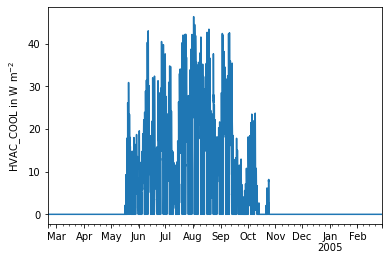

In [6]:
quantity_name = 'HVAC_COOL'
df[quantity_name].plot()
ylabel = standard_quantity_names['Buildings\' power demand for cooling']['unit']
plt.ylabel(f'{quantity_name} in ${ylabel}$');